In [ ]:
# ####### Install necessary libraries ####### #
!pip install pandas

In [ ]:
# ####### Import libraries ####### #
import pandas as pd
import gspread
from gspread_dataframe import get_as_dataframe
from google.colab import auth
from googleapiclient.discovery import build
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# ####### Authenticate
auth.authenticate_user()

from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)
drive_service = build('drive', 'v3', credentials=creds)

# There's a weird warning about the format and openpyxl but we don't gotta worry about that so ignore it
import warnings
warnings.simplefilter("ignore")

Mounted at /content/drive


In [ ]:
filepath = '/content/drive/My Drive/ElectionTime/data/'
committee = pd.read_json(filepath+'committee_reps.json')
reps_bills = pd.read_json(filepath+'reps_bills_combined.json')

In [ ]:
committee

,Committee,Role,Party,Representative,sheet_name,Office
0,Criminal Justice Appropriations Subcommittee,Chair,R,Brady Brammer,Committee_info,State Senate
1,Criminal Justice Appropriations Subcommittee,Chair,R,Matthew H. Gwynn,Committee_info,State House
2,Economic and Community Development Appropriati...,Chair,R,Calvin R. Musselman,Committee_info,State Senate
3,Economic and Community Development Appropriati...,Chair,R,Christine F. Watkins,Committee_info,State House
4,General Government Appropriations Subcommittee,Chair,R,Evan J. Vickers,Committee_info,State Senate
...,...,...,...,...,...,...
541,Transportation and Infrastructure Appropriatio...,Member,R,Jake Sawyer,Committee_info,State House
542,Transportation and Infrastructure Appropriatio...,Member,R,David Shallenberger,Committee_info,State House
543,Utah Behavioral Health Legislative Policy Comm...,Member,D,Luz Escamilla,Committee_info,State Senate
544,Utah Behavioral Health Legislative Policy Comm...,Member,R,Chris H. Wilson,Committee_info,State Senate


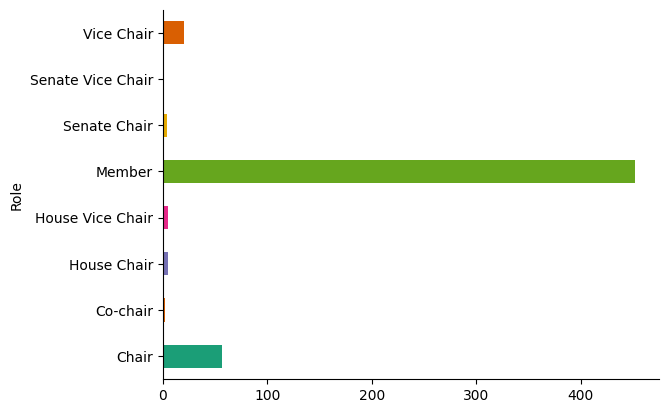

In [ ]:
# @title Role

from matplotlib import pyplot as plt
import seaborn as sns
committee.groupby('Role').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
reps_bills.head()

,Img_ID,Office,Rep_Name,District,Party,Email,County(ies),Webpage,Img_URL,Legislation_By_Representative,Bill Sponsor,New_Bills,Passed_Bills
0,PETERT,State House,Thomas W Peterson,1,R,tpeterson@le.utah.gov,"Box Elder, Cache",https://house.utleg.gov/rep/PETERT,https://le.utah.gov/images/legislator/house/PE...,https://le.utah.gov/asp/billsintro/SenResults....,"Peterson, T.","[{'Bill Number': 'HB0507', 'Link to Bill': 'ht...","[{'Bill Number': 'HB0032', 'Bill Title': 'Borg..."
1,PETERM,State House,Michael J Petersen,2,R,mpetersen@le.utah.gov,Cache,https://house.utleg.gov/rep/PETERM,https://le.utah.gov/images/legislator/house/PE...,https://le.utah.gov/asp/billsintro/SenResults....,"Petersen, M.",[],"[{'Bill Number': 'HB0095S02', 'Bill Title': 'F..."
2,THOMJA,State House,Jason E Thompson,3,R,jthompson@le.utah.gov,Cache,https://house.utleg.gov/rep/THOMJA,https://le.utah.gov/images/legislator/house/TH...,https://le.utah.gov/asp/billsintro/SenResults....,"Thompson, J.",[],"[{'Bill Number': 'HB0361S03', 'Bill Title': 'D..."
3,AUXIET,State House,Tiara Auxier,4,R,tauxier@le.utah.gov,"Daggett, Duchesne, Morgan, Rich, Summit",https://house.utleg.gov/rep/AUXIET,https://le.utah.gov/images/legislator/house/AU...,https://le.utah.gov/asp/billsintro/SenResults....,"Auxier, T.","[{'Bill Number': 'HB0472', 'Link to Bill': 'ht...","[{'Bill Number': 'HB0074', 'Bill Title': 'Fore..."
4,SNIDEC,State House,Casey Snider,5,R,csnider@le.utah.gov,Cache,https://house.utleg.gov/rep/SNIDEC,https://le.utah.gov/images/legislator/house/SN...,https://le.utah.gov/asp/billsintro/SenResults....,"Snider, C.",[],"[{'Bill Number': 'HB0237S01', 'Bill Title': 'R..."


In [ ]:
# reps_bills_combined.json is created using the ExtractData_CreateJson.ipynb script
'''
committee_reps.json is created using the CommitteeInfo_DataPrep.ipynb script
# Will have all representatives that are a part of a committee.
# It doesn't include extra committee memebers that are not in the state senate or state house
filename = 'committee_reps.json'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Committee       546 non-null    object
 1   Role            546 non-null    object
 2   Party           546 non-null    object
 3   Representative  546 non-null    object
 4   sheet_name      546 non-null    object
 5   Office          546 non-null    object
'''


